# 1. Problem statement

1. To what extent can structured Airbnb data support decision-making frameworks for tourism planning?
2. What analytical frameworks are most suitable for leveraging Airbnb Big Data in strategic tourism planning?
3. How can structured data from Airbnb listings inform the adaptation of prescriptive models for demand forecasting and host behavior analysis in tourism destinations?
4. Can forecasting models built on Airbnb data from one city be applied effectively to other cities for strategic tourism planning?

# 2. Data Collection

In [1]:
pip install "numpy<2" --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df_1 = pd.read_csv("/Users/brigitte/Desktop/Tesis Maestria/Thesis pipeline OG/LONDON/listings.csv", encoding="utf-8")

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [6]:
df_2 = pd.read_csv("/Users/brigitte/Desktop/Tesis Maestria/Thesis pipeline OG/LONDON/listings 2.csv", encoding="utf-8")

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [8]:
df = df_1.merge(df_2, on="id", how="inner")

In [9]:
df.head()

id                                           name_x  host_id_x  \
0  264776                      Huge Four Bedroom Apartment    1389063   
1  264777                            One Bedroom Apartment    1389063   
2  264778          Two Bedroom Newly Refurbished Apartment    1389063   
3  264779                Refurbished Two Bedroom Apartment    1389063   
4  264780  Spacious refurbished 2 bedroom apt with balcony    1389063   

  host_name_x  neighbourhood_group neighbourhood_x  latitude_x  longitude_x  \
0         Sue                  NaN        Lewisham    51.44306     -0.01948   
1         Sue                  NaN        Lewisham    51.44284     -0.01997   
2         Sue                  NaN        Lewisham    51.44359     -0.02275   
3         Sue                  NaN        Lewisham    51.44355     -0.02309   
4         Sue                  NaN        Lewisham    51.44333     -0.02307   

       room_type_x  price_x  minimum_nights_x  number_of_reviews_x  \
0  Entire home/apt    297.0                 3                   68   
1  Entire home/apt     98.0                 3                   24   
2  Entire home/apt    148.0                 3                   58   
3  Entire home/apt    144.0                 3                   36   
4  Entire home/apt    157.0                 3                   54   

  last_review_x  reviews_per_month_x  calculated_host_listings_count_x  \
0    2025-05-28                 0.51                                11   
1    2024-12-11                 0.22                                11   
2    2025-05-01                 0.43                                11   
3    2025-04-10                 0.30                                11   
4    2024-12-29                 0.35                                11   

   availability_365_x  number_of_reviews_ltm_x  license_x  \
0                 293                       12        NaN   
1                 318                        4        NaN   
2                 302                        6        NaN   
3                 328                        7        NaN   
4                 255                        4        NaN   

                           listing_url       scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                           name_y  \
0  city scrape                      Huge Four Bedroom Apartment   
1  city scrape                            One Bedroom Apartment   
2  city scrape          Two Bedroom Newly Refurbished Apartment   
3  city scrape                Refurbished Two Bedroom Apartment   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony   

                                         description  \
0  An extremely large and sunny four bedroom grou...   
1  Recently refurbished sunny one bedroom first f...   
2  A large and sunny two bedroom second floor apa...   
3  A large and sunny two bedroom second floor apa...   
4  Completely refurbished 2 bedroom apt to sleep ...   

                               neighborhood_overview  \
0  Catford is a well established London suburb. T...   
1                                                NaN   
2  Catford is a well established London suburb. T...   
3  Catford is a well established London suburb. T...   
4                                                NaN   

                                         picture_url  host_id_y  \
0  https://a0.muscache.com/pictures/hosting/Hosti...    1389063   
1  https://a0.muscache.com/pictures/hosting/Hosti...    1389063   
2  https://a0.muscache.com/pictures/50662093/af12...    1389063   
3  https://a0.muscache.com/pictures/50660860/e440...    1389063   
4  https://a0.muscach

# 3. Data Cleaning

In [10]:
#Dropping duplicate columns

cols = df.columns
cols_x = [c for c in cols if c.endswith("_x")]
cols_y = [c for c in cols if c.endswith("_y")]

df = df.drop(columns= cols_x)

rename_dict = {col: col.replace("_y", "") for col in cols_y}
df = df.rename(columns=rename_dict)

In [11]:
df.head()

id  neighbourhood_group                          listing_url  \
0  264776                  NaN  https://www.airbnb.com/rooms/264776   
1  264777                  NaN  https://www.airbnb.com/rooms/264777   
2  264778                  NaN  https://www.airbnb.com/rooms/264778   
3  264779                  NaN  https://www.airbnb.com/rooms/264779   
4  264780                  NaN  https://www.airbnb.com/rooms/264780   

        scrape_id last_scraped       source  \
0  20250610032232   2025-06-11  city scrape   
1  20250610032232   2025-06-11  city scrape   
2  20250610032232   2025-06-11  city scrape   
3  20250610032232   2025-06-11  city scrape   
4  20250610032232   2025-06-11  city scrape   

                                              name  \
0                      Huge Four Bedroom Apartment   
1                            One Bedroom Apartment   
2          Two Bedroom Newly Refurbished Apartment   
3                Refurbished Two Bedroom Apartment   
4  Spacious refurbished 2 bedroom apt with balcony   

                                         description  \
0  An extremely large and sunny four bedroom grou...   
1  Recently refurbished sunny one bedroom first f...   
2  A large and sunny two bedroom second floor apa...   
3  A large and sunny two bedroom second floor apa...   
4  Completely refurbished 2 bedroom apt to sleep ...   

                               neighborhood_overview  \
0  Catford is a well established London suburb. T...   
1                                                NaN   
2  Catford is a well established London suburb. T...   
3  Catford is a well established London suburb. T...   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/hosting/Hosti...  1389063   
1  https://a0.muscache.com/pictures/hosting/Hosti...  1389063   
2  https://a0.muscache.com/pictures/50662093/af12...  1389063   
3  https://a0.muscache.com/pictures/50660860/e440...  1389063   
4  https://a0.muscache.com/pictures/airflow/Hosti...  1389063   

                                    host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
1  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
2  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
3  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   
4  https://www.airbnb.com/users/show/1389063       Sue  2011-11-09   

    host_location                                         host_about  \
0  United Kingdom  I own the Glenthurston Apartments and have don...   
1  United Kingdom  I own the Glenthurston Apartments and have don...   
2  United Kingdom  I own the Glenthurston Apartments and have don...   
3  United Kingdom  I own the Glenthurston Apartments and have don...   
4  United Kingdom  I own the Glenthurston Apartments and have don...   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour                86%                 100%   
1     within an hour                86%                 100%   
2     within an hour                86%                 100%   
3     within an hour                86%                 100%   
4     within an hour                86%                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/a0985...   
1                 f  https://a0.muscache.com/im/pictures/user/a0985...   
2                 f  https://a0.muscache.com/im/pictures/user/a0985...   
3                 f  https://a0.muscache.com/im/pictures/user/a0985...   
4                 f  https://a0.muscache.com/im/pictures/user/a0985...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
1  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham  

# 4. Data Preprocessing

In [12]:
# 1st Feature engineering section - column 0 to 10 

#dropping id, host_id, host_url, host_name - features with unique identifier

df_clean = df.drop(columns=["id", "host_id", "host_url", "host_name"])

#host_since: extracting the amount of time that a host is in the platform

df_clean["host_since"] = pd.to_datetime(df_clean["host_since"], errors="coerce")
df_clean["host_tenure_days"] = (datetime.now() - df_clean["host_since"]).dt.days

#host_location: as the information is disperse it will be extracted if the host is from UK (Airbnb location) or not 
# United Kingdom = Host is in UK; No United Kingdom = Host is not in the UK; No location = Host location info is missing 

df_clean["host_is_local"] = df_clean["host_location"].apply(
    lambda x: "UK" if isinstance(x,str) and "United Kingdom" in x else("No UK" if isinstance(x,str) else "No Location")
)

first_df = df_clean.drop(columns=["host_location"])

In [13]:
# 2nd Feature engineering section

#Price feature - creating price per guest

first_df["price"] = first_df["price"].replace("[\$,]", "", regex=True).astype(float)

first_df["price_per_guest"] = first_df.apply(
    lambda row: round(row["price"] / row["accommodates"], 2) if row ["accommodates"] 
    and row["accommodates"]> 0 else round(row['price'], 2), axis=1
)

#Minimum_nights - creating bins to categorize 

def categorize_min_nights(n):
    if n<= 3:
        return "short_stay"
    elif n<=14:
        return "mid_stay"
    else:
        return "long_stay"
    
first_df["min_nights_category"] = first_df["minimum_nights"].apply(categorize_min_nights)

#dropping engineered features:

second_df = first_df.drop(columns=["minimum_nights", ])

In [14]:
# 3rd Feature engineering section

#Amenities, creating a column whether if the Airbnb listing have or do not have amenities and how many 

import ast

second_df["amenities_list"] = second_df["amenities"].apply(ast.literal_eval)

second_df["amenities_count"] = second_df["amenities_list"].apply(len)
    
#Maximum_nights, adjusting all the nights to maximum a year

max_night_cap = 365

second_df["maximum_nights_capped"] = second_df["maximum_nights"].apply(lambda x: min(x, max_night_cap))
    
#dropping features non needed

third_df = second_df.drop(columns=["amenities", "amenities_list", "maximum_nights"])

In [15]:
# 4th Feature engineering section

#in this section some columns that contain redundant information will be dropped

df_preprocessed = third_df.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                                  "maximum_maximum_nights", "availability_60", "availability_90"])

In [16]:
# 5th Feature engineering section

#Creating bins for feature: reviews per month

bins = [0, 1, 5, 10, df_preprocessed["reviews_per_month"].max()]
labels = ["0-1", "2-5", "6-10", "11+"]

df_preprocessed["reviews_per_month_bins"] = pd.cut(df_preprocessed["reviews_per_month"], bins=bins, labels=labels, include_lowest=True)

In [17]:
df_preprocessed.head()

neighbourhood_group                          listing_url       scrape_id  \
0                  NaN  https://www.airbnb.com/rooms/264776  20250610032232   
1                  NaN  https://www.airbnb.com/rooms/264777  20250610032232   
2                  NaN  https://www.airbnb.com/rooms/264778  20250610032232   
3                  NaN  https://www.airbnb.com/rooms/264779  20250610032232   
4                  NaN  https://www.airbnb.com/rooms/264780  20250610032232   

  last_scraped       source                                             name  \
0   2025-06-11  city scrape                      Huge Four Bedroom Apartment   
1   2025-06-11  city scrape                            One Bedroom Apartment   
2   2025-06-11  city scrape          Two Bedroom Newly Refurbished Apartment   
3   2025-06-11  city scrape                Refurbished Two Bedroom Apartment   
4   2025-06-11  city scrape  Spacious refurbished 2 bedroom apt with balcony   

                                         description  \
0  An extremely large and sunny four bedroom grou...   
1  Recently refurbished sunny one bedroom first f...   
2  A large and sunny two bedroom second floor apa...   
3  A large and sunny two bedroom second floor apa...   
4  Completely refurbished 2 bedroom apt to sleep ...   

                               neighborhood_overview  \
0  Catford is a well established London suburb. T...   
1                                                NaN   
2  Catford is a well established London suburb. T...   
3  Catford is a well established London suburb. T...   
4                                                NaN   

                                         picture_url host_since  \
0  https://a0.muscache.com/pictures/hosting/Hosti... 2011-11-09   
1  https://a0.muscache.com/pictures/hosting/Hosti... 2011-11-09   
2  https://a0.muscache.com/pictures/50662093/af12... 2011-11-09   
3  https://a0.muscache.com/pictures/50660860/e440... 2011-11-09   
4  https://a0.muscache.com/pictures/airflow/Hosti... 2011-11-09   

                                          host_about host_response_time  \
0  I own the Glenthurston Apartments and have don...     within an hour   
1  I own the Glenthurston Apartments and have don...     within an hour   
2  I own the Glenthurston Apartments and have don...     within an hour   
3  I own the Glenthurston Apartments and have don...     within an hour   
4  I own the Glenthurston Apartments and have don...     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                86%                 100%                 f   
1                86%                 100%                 f   
2                86%                 100%                 f   
3                86%                 100%                 f   
4                86%                 100%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/a0985...   
1  https://a0.muscache.com/im/pictures/user/a0985...   
2  https://a0.muscache.com/im/pictures/user/a0985...   
3  https://a0.muscache.com/im/pictures/user/a0985...   
4  https://a0.muscache.com/im/pictures/user/a0985...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
1  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
2  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
3  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
4  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   

   host_listings_count  host_total_listings_count  host_verifications  \
0                 11.0                       12.0  ['email', 'phone']   
1                 11.0                       12.0  ['email', 'phone']   
2                 11.0                       12.0  ['email', 'phone']   
3                 11.0                       12.0  ['email',

# 5. Data Visualization

## EDA exploration

In [18]:
#Identifying cardinality table for all features

cardinality_df = pd.DataFrame({
    "Feature": df_preprocessed.columns,
    "Unique_values": [df_preprocessed[col].nunique() for col in df_preprocessed.columns]
}).sort_values(by="Unique_values", ascending=False).reset_index(drop=True)

cardinality_df

Feature  Unique_values
0                    listing_url          96651
1                    picture_url          94282
2                           name          93000
3                    description          82842
4                      longitude          64050
..                           ...            ...
68                     scrape_id              1
69              calendar_updated              0
70                       license              0
71  neighbourhood_group_cleansed              0
72           neighbourhood_group              0

[73 rows x 2 columns]

In [19]:
cardinality_df.to_csv("cardinality_table.csv", index=False)

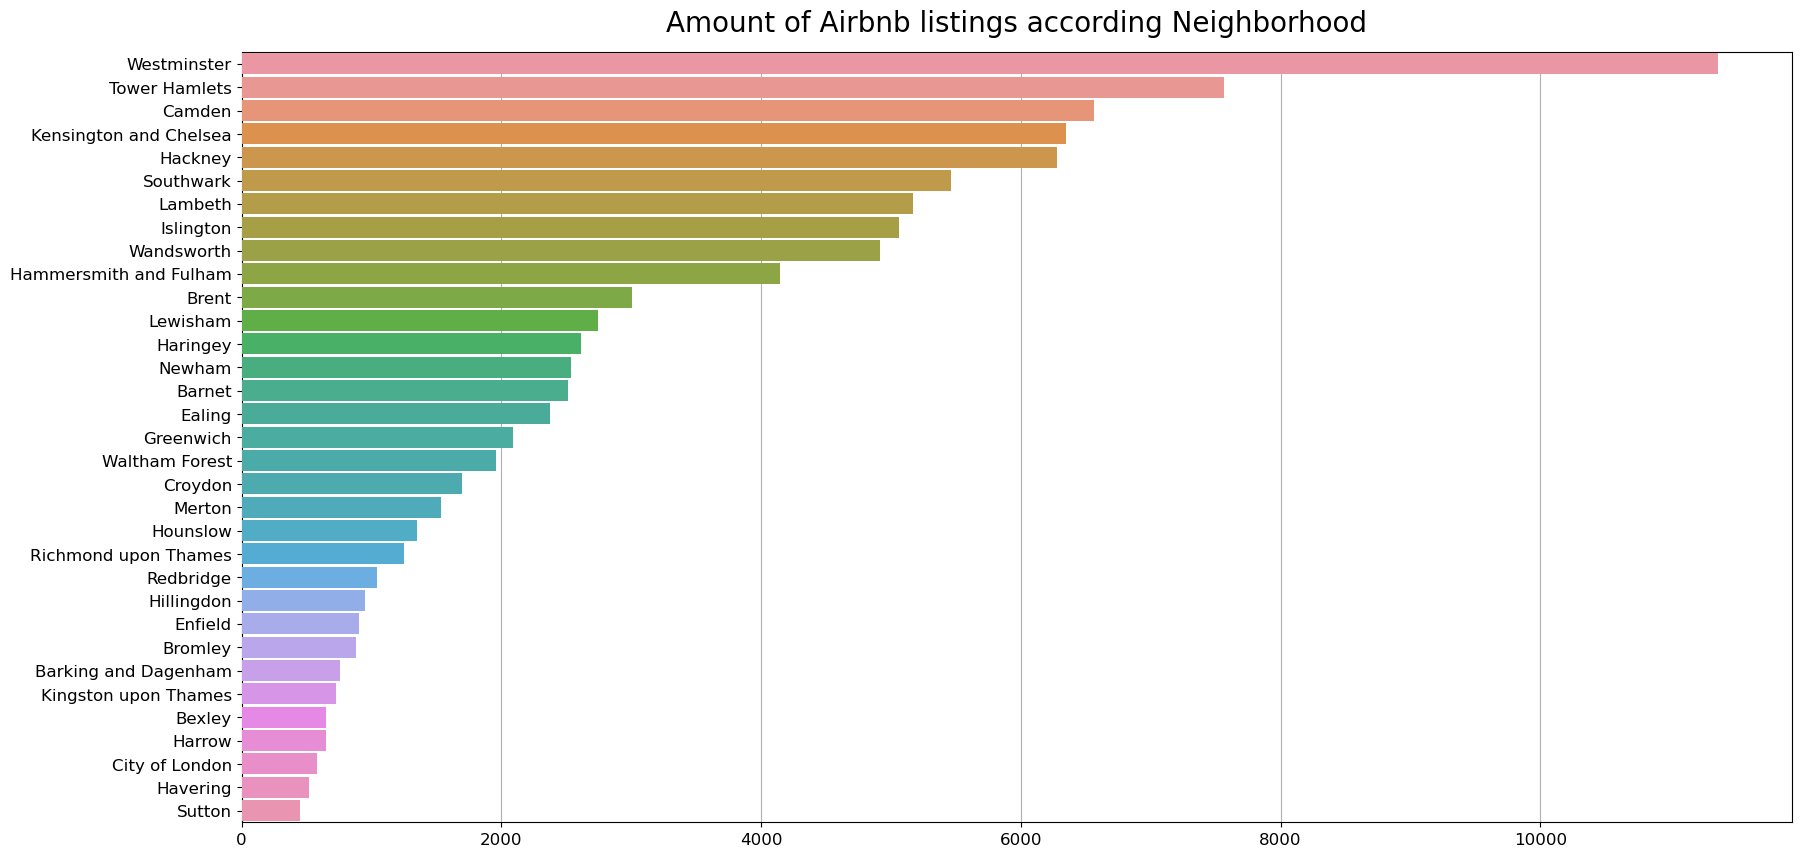

In [20]:
plt.subplots(figsize=(20,10))

order=df_preprocessed["neighbourhood_cleansed"].value_counts().index

sns.countplot(data=df_preprocessed,
            y="neighbourhood_cleansed",
            width=0.9,
            order=order,
            zorder=3
        )

plt.xlabel("", fontsize=15, labelpad=10.0)
plt.ylabel("", fontsize=15, labelpad=10.0)
plt.title("Amount of Airbnb listings according Neighborhood", fontsize=20, pad=15.0)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.xticks(rotation=0)
plt.grid(axis="x", zorder=0)
plt.show()

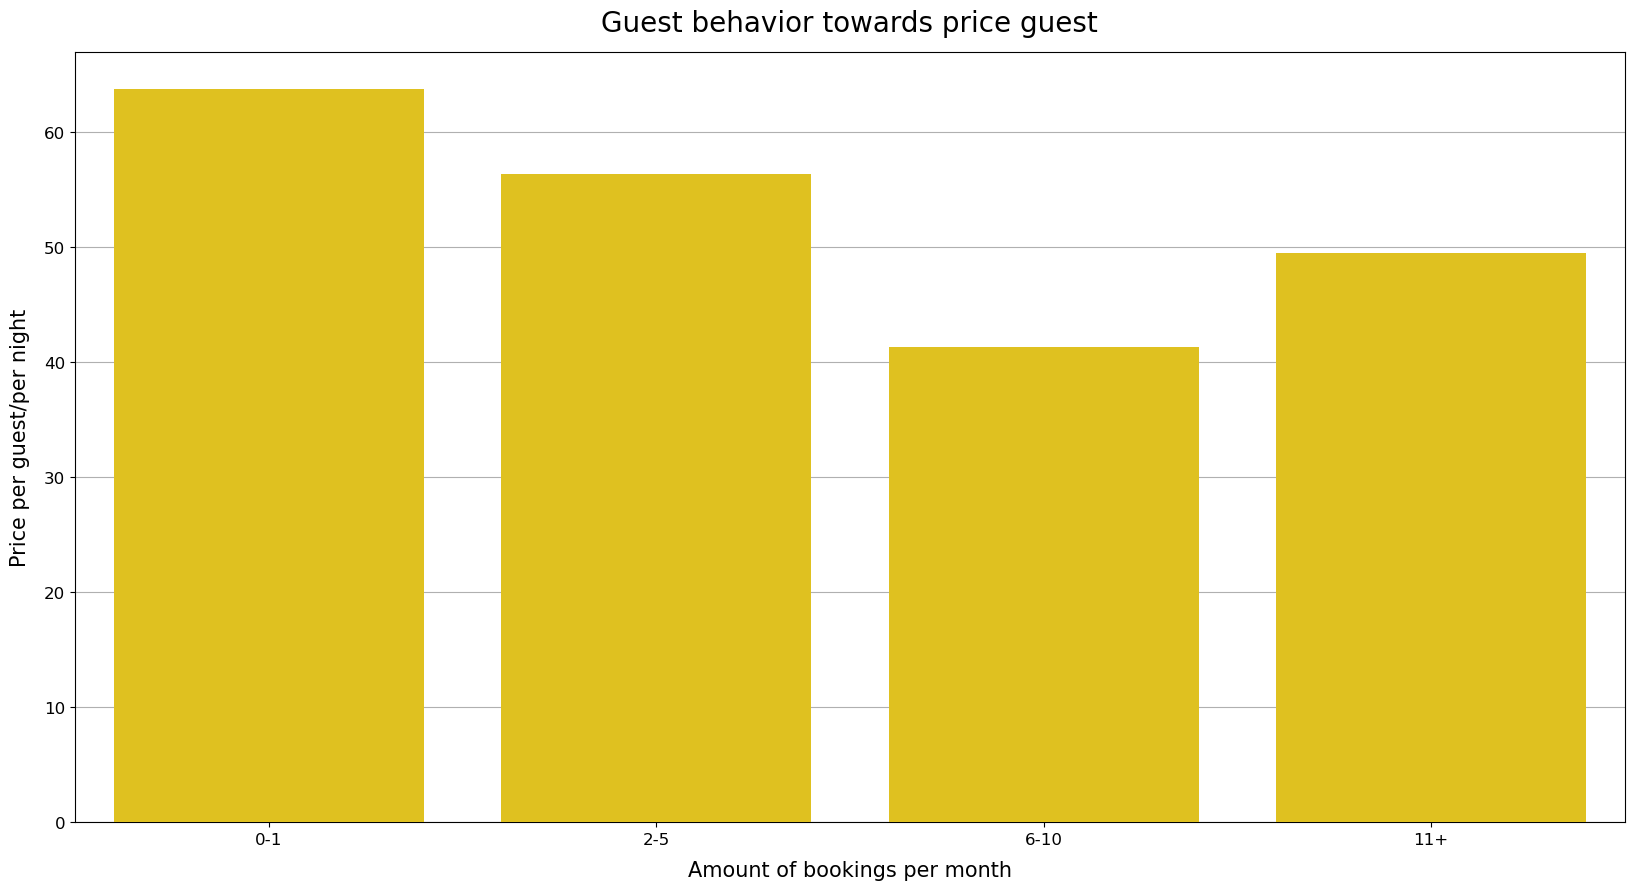

In [21]:
plt.subplots(figsize=(20,10))

sns.barplot(data=df_preprocessed,
            x="reviews_per_month_bins",
            y="price_per_guest",
            errorbar=None,
            color="gold",
            zorder=3
        )

plt.xlabel("Amount of bookings per month", fontsize=15, labelpad=10.0)
plt.ylabel("Price per guest/per night", fontsize=15, labelpad=10.0)
plt.title("Guest behavior towards price guest", fontsize=20, pad=15.0)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.grid(axis="y", zorder=0)
plt.show()

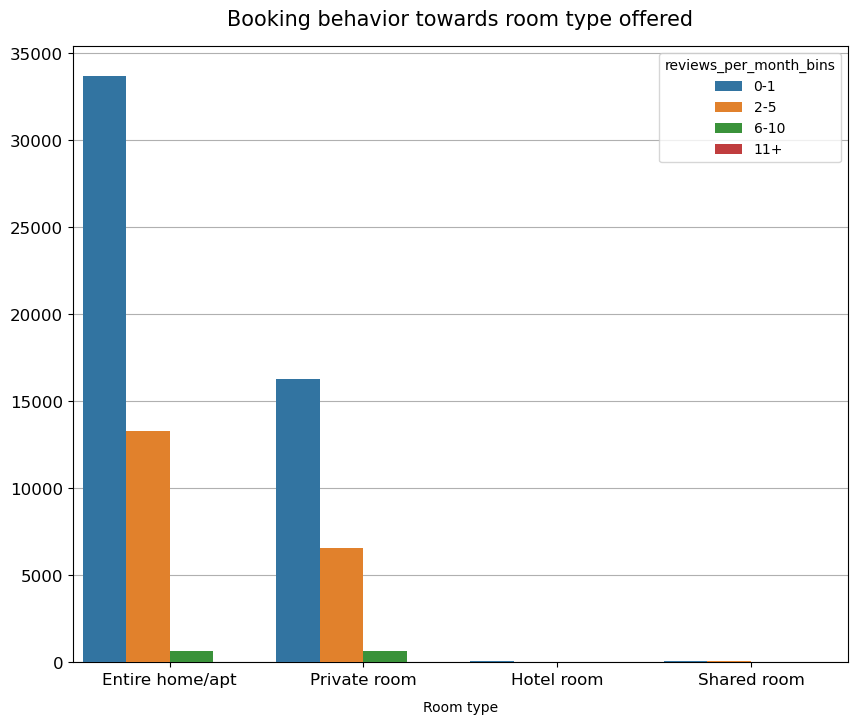

In [22]:
plt.subplots(figsize=(10,8))

sns.countplot(data=df_preprocessed,
            hue="reviews_per_month_bins",
            x="room_type",
            width=0.9,
            zorder=3
        )

plt.xlabel("Room type", fontsize=10, labelpad=10.0)
plt.ylabel("", fontsize=10, labelpad=10.0)
plt.title("Booking behavior towards room type offered", fontsize=15, pad=15.0)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.grid(axis="y", zorder=0)
plt.show()

In [49]:
df_preprocessed.head()

neighbourhood_group                          listing_url       scrape_id  \
0                  NaN  https://www.airbnb.com/rooms/264776  20250610032232   
1                  NaN  https://www.airbnb.com/rooms/264777  20250610032232   
2                  NaN  https://www.airbnb.com/rooms/264778  20250610032232   
3                  NaN  https://www.airbnb.com/rooms/264779  20250610032232   
4                  NaN  https://www.airbnb.com/rooms/264780  20250610032232   

  last_scraped       source                                             name  \
0   2025-06-11  city scrape                      Huge Four Bedroom Apartment   
1   2025-06-11  city scrape                            One Bedroom Apartment   
2   2025-06-11  city scrape          Two Bedroom Newly Refurbished Apartment   
3   2025-06-11  city scrape                Refurbished Two Bedroom Apartment   
4   2025-06-11  city scrape  Spacious refurbished 2 bedroom apt with balcony   

                                         description  \
0  An extremely large and sunny four bedroom grou...   
1  Recently refurbished sunny one bedroom first f...   
2  A large and sunny two bedroom second floor apa...   
3  A large and sunny two bedroom second floor apa...   
4  Completely refurbished 2 bedroom apt to sleep ...   

                               neighborhood_overview  \
0  Catford is a well established London suburb. T...   
1                                                NaN   
2  Catford is a well established London suburb. T...   
3  Catford is a well established London suburb. T...   
4                                                NaN   

                                         picture_url host_since  \
0  https://a0.muscache.com/pictures/hosting/Hosti... 2011-11-09   
1  https://a0.muscache.com/pictures/hosting/Hosti... 2011-11-09   
2  https://a0.muscache.com/pictures/50662093/af12... 2011-11-09   
3  https://a0.muscache.com/pictures/50660860/e440... 2011-11-09   
4  https://a0.muscache.com/pictures/airflow/Hosti... 2011-11-09   

                                          host_about host_response_time  \
0  I own the Glenthurston Apartments and have don...     within an hour   
1  I own the Glenthurston Apartments and have don...     within an hour   
2  I own the Glenthurston Apartments and have don...     within an hour   
3  I own the Glenthurston Apartments and have don...     within an hour   
4  I own the Glenthurston Apartments and have don...     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                86%                 100%                 f   
1                86%                 100%                 f   
2                86%                 100%                 f   
3                86%                 100%                 f   
4                86%                 100%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/a0985...   
1  https://a0.muscache.com/im/pictures/user/a0985...   
2  https://a0.muscache.com/im/pictures/user/a0985...   
3  https://a0.muscache.com/im/pictures/user/a0985...   
4  https://a0.muscache.com/im/pictures/user/a0985...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
1  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
2  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
3  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   
4  https://a0.muscache.com/im/pictures/user/a0985...         Bellingham   

   host_listings_count  host_total_listings_count  host_verifications  \
0                 11.0                       12.0  ['email', 'phone']   
1                 11.0                       12.0  ['email', 'phone']   
2                 11.0                       12.0  ['email', 'phone']   
3                 11.0                       12.0  ['email',

In [25]:
df_preprocessed.describe()

neighbourhood_group     scrape_id  host_listings_count  \
count                  0.0  9.665100e+04         96613.000000   
mean                   NaN  2.025061e+13            46.263577   
std                    NaN  3.301970e+01           357.645418   
min                    NaN  2.025061e+13             1.000000   
25%                    NaN  2.025061e+13             1.000000   
50%                    NaN  2.025061e+13             2.000000   
75%                    NaN  2.025061e+13             9.000000   
max                    NaN  2.025061e+13          4884.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               96613.000000                           0.0  96651.000000   
mean                   76.334945                           NaN     51.509818   
std                   561.614957                           NaN      0.048945   
min                     1.000000                           NaN     51.295937   
25%                     1.000000                           NaN     51.484240   
50%                     3.000000                           NaN     51.513791   
75%                    14.000000                           NaN     51.539099   
max                  8723.000000                           NaN     51.682630   

          longitude  accommodates     bathrooms      bedrooms          beds  \
count  96651.000000  96651.000000  62730.000000  84071.000000  62676.000000   
mean      -0.127087      3.316520      1.358018      1.603823      1.940966   
std        0.100853      2.073674      0.725580      1.041939      1.430231   
min       -0.496760      1.000000      0.000000      0.000000      0.000000   
25%       -0.189060      2.000000      1.000000      1.000000      1.000000   
50%       -0.126990      2.000000      1.000000      1.000000      1.000000   
75%       -0.067880      4.000000      1.500000      2.000000      2.000000   
max        0.278960     16.000000     26.000000     50.000000     50.000000   

              price  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count  62684.000000            96651.000000            9.665100e+04   
mean     213.366058                6.287978            2.949694e+05   
std      860.901557               23.091292            2.495603e+07   
min        6.000000                1.000000            1.000000e+00   
25%       75.000000                1.000000            9.900000e+01   
50%      135.000000                2.000000            3.650000e+02   
75%      225.000000                4.000000            1.125000e+03   
max    74100.000000             1125.000000            2.147484e+09   

       calendar_updated  availability_30  availability_365  number_of_reviews  \
count               0.0     96651.000000      96651.000000       96651.000000   
mean                NaN         8.182709        139.697365          20.891734   
std                 NaN        10.355118        137.426817          49.922266   
min                 NaN         0.000000          0.000000           0.000000   
25%                 NaN         0.000000          0.000000           0.000000   
50%                 NaN         3.000000         93.000000           4.000000   
75%                 NaN        14.000000        270.000000          19.000000   
max                 NaN        30.000000        365.000000        1855.000000   

       number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  \
count           96651.000000            96651.000000      96651.000000   
mean                5.634665                0.491149         81.856111   
std                11.951389                1.222539         78.040168   
min                 0.000000                0.000000          0.000000   
25%                 0.000000                0.000000          0.000000   
50%                 0.000000                0.000000         68.000000   
75%                 6.000000                0.000000        159.000000   
max               355.0000

## Host Dimension

In [26]:
import plotly.io as pio

pio.renderers.default = "notebook_connected"

In [27]:
sample_df = df_preprocessed.sample(n=1000, random_state=42)

In [28]:
# DBSCAN for Host dimension

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

x = df_preprocessed[["reviews_per_month", "host_total_listings_count"]].dropna()

if len(x) >10000:
    x = x.sample(10000, random_state=42)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
db = DBSCAN(eps=0.8, min_samples=3)
clusters = db.fit_predict(x_scaled)

x["cluster"] = clusters

In [30]:
x["amenities_count"] = df_preprocessed["amenities_count"]

In [48]:
fig = px.scatter(
    x,
    x="amenities_count",
    y="host_total_listings_count",
    color="reviews_per_month",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"amenities_count": "Amount of reviews per month"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of amenities per host"
)

fig.show()

In [32]:
x["host_is_local"] = df_preprocessed["host_is_local"]

In [50]:
fig = px.scatter(
    x,
    x="reviews_per_month",
    y="host_total_listings_count",
    color="host_is_local",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_is_local": "Host is local?"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of reviews per month"
)

fig.show()

In [51]:
x["calculated_host_listings_count_entire_homes"] = df_preprocessed["calculated_host_listings_count_entire_homes"]

In [52]:
fig = px.scatter(
    x,
    x="calculated_host_listings_count_entire_homes",
    y="host_total_listings_count",
    color="reviews_per_month",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"reviews_per_month": "Amount of reviews per month"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of entire homes per Host"
)

fig.show()

In [36]:
x["calculated_host_listings_count_private_rooms"] = df_preprocessed["calculated_host_listings_count_private_rooms"]

In [53]:
fig = px.scatter(
    x,
    x="calculated_host_listings_count_private_rooms",
    y="host_total_listings_count",
    color="reviews_per_month",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"reviews_per_month": "Amount of reviews per month"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of private rooms per host"
)

fig.show()

In [38]:
x["calculated_host_listings_count_shared_rooms"] = df_preprocessed["calculated_host_listings_count_shared_rooms"]

In [54]:
fig = px.scatter(
    x,
    x="calculated_host_listings_count_shared_rooms",
    y="host_total_listings_count",
    color="reviews_per_month",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"reviews_per_month": "Amount of reviews per month"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of shared rooms per Host"
)

fig.show()

In [40]:
x["instant_bookable"] = df_preprocessed["instant_bookable"]

In [55]:
fig = px.scatter(
    x,
    x="reviews_per_month",
    y="host_total_listings_count",
    color="instant_bookable",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"instant_bookable": "Listing is instant bookable?"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of reviews per month"
)

fig.show()

In [42]:
x["estimated_revenue_l365d"] = df_preprocessed["estimated_revenue_l365d"]

In [56]:
fig = px.scatter(
    x,
    x="estimated_revenue_l365d",
    y="host_total_listings_count",
    color="reviews_per_month",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"reviews_per_month": "Amount of reviews per month"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Estimated revenue in last year"
)

fig.show()

In [44]:
x["host_verifications"] = df_preprocessed["host_verifications"]

In [57]:
fig = px.scatter(
    x,
    x="reviews_per_month",
    y="host_total_listings_count",
    color="host_verifications",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_verifications": "Host verifications methods"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of reviews per month"
)

fig.show()

In [46]:
x["host_is_superhost"] = df_preprocessed["host_is_superhost"]

In [58]:
fig = px.scatter(
    x,
    x="reviews_per_month",
    y="host_total_listings_count",
    color="host_is_superhost",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_is_superhost": "Host is superhost?"}
)

fig.update_layout(
    yaxis_title="Amount of Hosts' listings",
    xaxis_title="Amount of reviews per month"
)

fig.show()